In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import scipy.stats as stats

In [4]:
claim=pd.read_csv("C:/Users/lenovo/Desktop/py/Case Study 3 - Insurance Claims Case Study/claims.csv")

In [6]:
demo = pd.read_csv("C:/Users/lenovo/Desktop/py/Case Study 3 - Insurance Claims Case Study/cust_demographics.csv")

In [9]:
merged_df = pd.merge(claim,demo, left_on="customer_id",right_on= "CUST_ID",how="inner")
merged_df

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [10]:
'print("Datatypes of each column:")
print(merged_df.dtypes)

datatype_mismatches = []

# Define the expected datatypes based on business significance
expected_datatypes = {
    'claim_id': 'int64',
    'customer_id': 'int64',
    'incident_cause': 'object',
    'claim_date': 'object',
    'claim_area': 'object',
    'police_report': 'object',
    'claim_type': 'object',
    'claim_amount': 'float64',
    'total_policy_claims': 'float64',
    'fraudulent': 'object',
    'CUST_ID': 'int64',
    'gender': 'object',
    'DateOfBirth': 'object',
    'State': 'object',
    'Contact': 'object',
    'Segment': 'object'
}

# Check for datatype mismatches
for column in merged_df.columns:
    current_datatype = str(merged_df[column].dtype)
    expected_datatype = expected_datatypes.get(column, 'Not specified')

    if current_datatype != expected_datatype:
        datatype_mismatches.append({
            'Column': column,
            'Current Datatype': current_datatype,
            'Expected Datatype': expected_datatype
        })

# Display the datatype mismatches
print("\nDatatype Mismatches:")
if not datatype_mismatches:
    print("No datatype mismatches found.")
else:
    for mismatch in datatype_mismatches:
        print(f"Column: {mismatch['Column']}, Current Datatype: {mismatch['Current Datatype']}, Expected Datatype: {mismatch['Expected Datatype']}")


Datatypes of each column:
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

Datatype Mismatches:
Column: claim_amount, Current Datatype: object, Expected Datatype: float64


In [11]:
print("Initial datatype of 'claim_amount':", merged_df['claim_amount'].dtype)

merged_df['claim_amount'] = pd.to_numeric(merged_df['claim_amount'].str.replace('$', ''))

print("Updated datatype of 'claim_amount':", merged_df['claim_amount'].dtype)

Initial datatype of 'claim_amount': object
Updated datatype of 'claim_amount': float64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_8976\2399673849.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df['claim_amount'] = pd.to_numeric(merged_df['claim_amount'].str.replace('$', ''))


In [12]:
merged_df['unreported_alert_flag'] = ((merged_df['claim_type'] == 'Injury') & (merged_df['police_report'] == 'NO')).astype(int)

merged_df[['claim_id', 'claim_type', 'police_report', 'unreported_alert_flag']]


,claim_id,claim_type,police_report,unreported_alert_flag
0,54004764,Material only,No,0
1,33985796,Material only,Unknown,0
2,53522022,Material only,No,0
3,63017412,Material only,No,0
4,13015401,Material only,No,0
...,...,...,...,...
1080,62020796,Material only,Yes,0
1081,63269067,Material only,No,0
1082,22690595,Injury only,Yes,0
1083,12376894,Material only,No,0


In [13]:
merged_df['claim_date'] = pd.to_datetime(merged_df['claim_date'])
merged_df = merged_df.sort_values(by='claim_date', ascending=False)
merged_df_unique = merged_df.drop_duplicates(subset='customer_id', keep='first')
merged_df_unique.head(100)




,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_alert_flag
286,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,93915431,Male,08-Sep-67,ME,134-785-1687,Gold,0
354,98795403,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,38011078,Female,20-May-76,NE,271-123-1475,Gold,0
1055,43042986,58451506,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,58451506,Male,22-Apr-68,FL,673-574-7823,Gold,0
941,74761374,46710738,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,46710738,Male,28-Apr-77,MO,962-834-9361,Gold,0
322,87329176,77510822,Other driver error,2018-10-30,Auto,Unknown,Material only,NaN,2.0,No,77510822,Female,18-Mar-86,AK,436-934-7156,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,21491548,44643917,Other driver error,2018-09-06,Auto,Yes,Material and injury,41320.0,NaN,No,44643917,Male,19-Dec-68,WA,278-698-5972,Gold,0
870,64295975,21774335,Natural causes,2018-09-06,Auto,No,Material only,NaN,1.0,No,21774335,Male,07-Feb-77,OK,127-839-1746,Gold,0
614,54642809,39959491,Driver error,2018-09-06,Auto,Unknown,Material only,2720.0,1.0,No,39959491,Female,07-Apr-95,DE,139-742-5417,Silver,0
482,15267466,80701300,Other causes,2018-09-06,Auto,Yes,Material only,1150.0,2.0,Yes,80701300,Female,28-Jul-94,MS,593-423-4839,Silver,0


In [14]:
missing_values = merged_df.isnull().sum()
print("Missing Values:")
print(missing_values)

continuous_columns = merged_df.select_dtypes(include=['float64']).columns
merged_df[continuous_columns] = merged_df[continuous_columns].fillna(merged_df[continuous_columns].mean())

categorical_columns = merged_df.select_dtypes(include=['object']).columns
merged_df[categorical_columns] = merged_df[categorical_columns].fillna(merged_df[categorical_columns].mode().iloc[0])

missing_values_after_imputation = merged_df.isnull().sum()
print("\nMissing Values After Imputation:")
print(missing_values_after_imputation)

Missing Values:
claim_id                  0
customer_id               0
incident_cause            0
claim_date                0
claim_area                0
police_report             0
claim_type                0
claim_amount             65
total_policy_claims      10
fraudulent                0
CUST_ID                   0
gender                    0
DateOfBirth               0
State                     0
Contact                   0
Segment                   0
unreported_alert_flag     0
dtype: int64

Missing Values After Imputation:
claim_id                 0
customer_id              0
incident_cause           0
claim_date               0
claim_area               0
police_report            0
claim_type               0
claim_amount             0
total_policy_claims      0
fraudulent               0
CUST_ID                  0
gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
unreported_alert_flag    0
dt

In [15]:
merged_df['DateOfBirth'] = pd.to_datetime(merged_df['DateOfBirth'], format='%d-%b-%y')
current_date = pd.to_datetime('today')
merged_df['DateOfBirth'] = merged_df['DateOfBirth'].apply(lambda x: x - pd.DateOffset(years=100) if x.year > current_date.year else x)


merged_df['Age'] = (current_date - merged_df['DateOfBirth']).astype('<m8[Y]')

bins = [0, 18, 30, 60, float('inf')]
labels = ['Children', 'Youth', 'Adult', 'Senior']
merged_df['Age_Category'] = pd.cut(merged_df['Age'], bins=bins, labels=labels, right=False)

merged_df[['CUST_ID', 'DateOfBirth', 'Age', 'Age_Category']]

,CUST_ID,DateOfBirth,Age,Age_Category
286,93915431,1967-09-08,56.0,Adult
354,38011078,1976-05-20,47.0,Adult
1055,58451506,1968-04-22,55.0,Adult
941,46710738,1977-04-28,46.0,Adult
322,77510822,1986-03-18,37.0,Adult
...,...,...,...,...
231,77219712,1999-08-05,24.0,Youth
905,42664554,1993-08-13,30.0,Adult
195,64840478,1974-02-14,49.0,Adult
177,74155265,1985-11-16,38.0,Adult


In [16]:
average_claim_amount_by_segment = merged_df.groupby('Segment')['claim_amount'].mean()
print("Average Amount Claimed by Customers from Various Segments:")
average_claim_amount_by_segment

Average Amount Claimed by Customers from Various Segments:


Segment
Gold        12829.631974
Platinum    12341.952267
Silver      12208.435570
Name: claim_amount, dtype: float64

In [17]:
merged_df['claim_date'] = pd.to_datetime(merged_df['claim_date'], format='%d-%b-%y')
reference_date = pd.to_datetime('2018-10-01')
filtered_df = merged_df[merged_df['claim_date'] <= reference_date - pd.Timedelta(days=20)]
total_claim_amount_by_cause = filtered_df.groupby('incident_cause')['claim_amount'].sum()
print("Total Claim Amount Based on Incident Cause (at least 20 days prior to 1st October 2018):")
print(total_claim_amount_by_cause)

Total Claim Amount Based on Incident Cause (at least 20 days prior to 1st October 2018):
incident_cause
Crime                 7.244484e+05
Driver error          3.319952e+06
Natural causes        1.314121e+06
Other causes          3.724985e+06
Other driver error    3.318770e+06
Name: claim_amount, dtype: float64


In [19]:
filtered_df = merged_df[(merged_df['Age_Category'] == 'Adult') & (merged_df['State'].isin(['TX','DE','AK'])) & (merged_df['incident_cause'].str.contains('Driver'))]
num_adults_driver_issues = len(filtered_df)
print( num_adults_driver_issues)


18


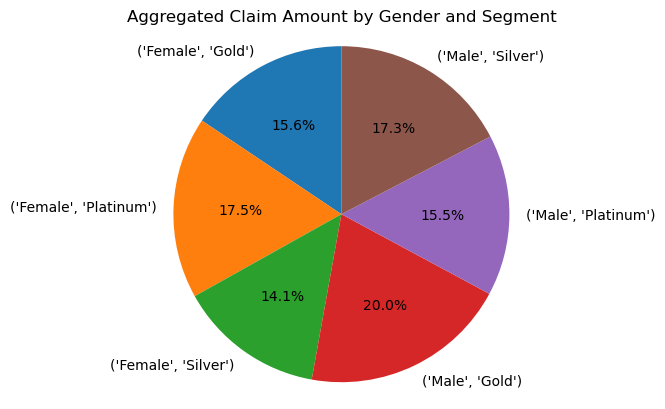

In [20]:
agg_claim_amount = merged_df.groupby(['gender', 'Segment'])['claim_amount'].sum()

fig, ax = plt.subplots()
ax.pie(agg_claim_amount, labels=agg_claim_amount.index, autopct='%1.1f%%', startangle=90)

ax.axis('equal')

# Display the result
plt.title('Aggregated Claim Amount by Gender and Segment')
plt.show()

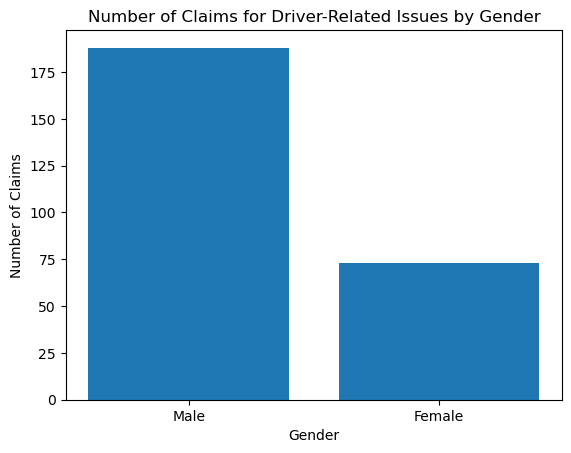

In [21]:
driver_related_df = merged_df[merged_df['incident_cause'].str.contains('Driver')]
gender_claim_count = driver_related_df['gender'].value_counts()

plt.bar(gender_claim_count.index, gender_claim_count)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Claims')
plt.title('Number of Claims for Driver-Related Issues by Gender')

# Show the bar chart
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8976\1337290762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudulent_df['Age'] = (current_date - fraudulent_df['DateOfBirth']).astype('<m8[Y]')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8976\1337290762.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudulent_df['Age_Category'] = pd.cut(fraudulent_df['Age'], bins=bins, labels=labels, right=False)


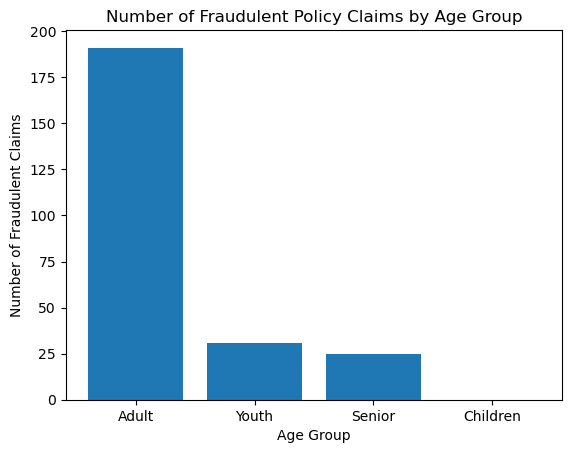

In [22]:
fraudulent_df = merged_df[merged_df['fraudulent'] == 'Yes']
current_date = pd.to_datetime('today')
fraudulent_df['Age'] = (current_date - fraudulent_df['DateOfBirth']).astype('<m8[Y]')
bins = [0, 18, 30, 60, float('inf')]
labels = ['Children', 'Youth', 'Adult', 'Senior']
fraudulent_df['Age_Category'] = pd.cut(fraudulent_df['Age'], bins=bins, labels=labels, right=False)
age_fraudulent_count = fraudulent_df['Age_Category'].value_counts()
plt.bar(age_fraudulent_count.index, age_fraudulent_count)
plt.xlabel('Age Group')
plt.ylabel('Number of Fraudulent Claims')
plt.title('Number of Fraudulent Policy Claims by Age Group')
plt.show()


14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order

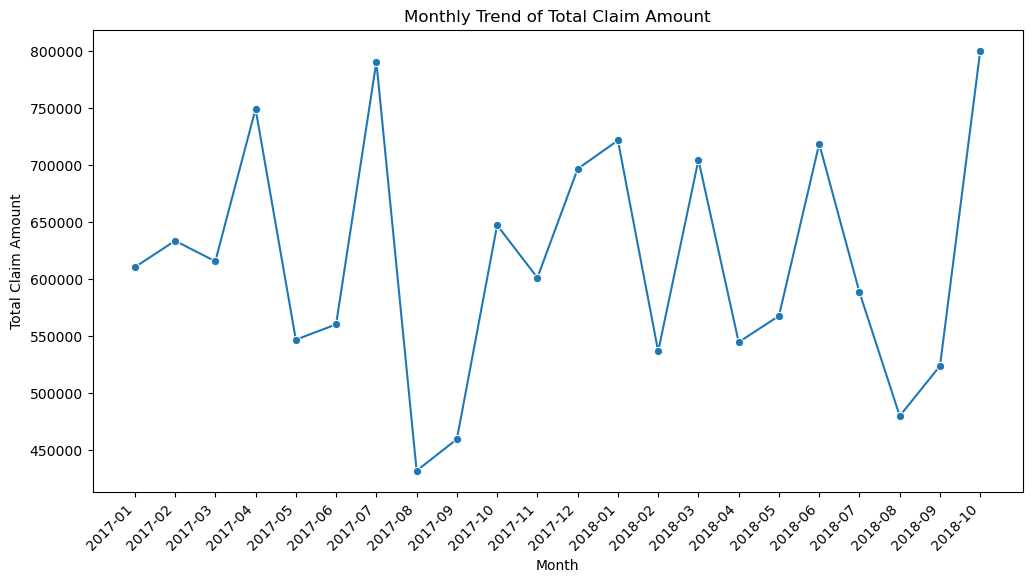

In [23]:
merged_df['claim_date'] = pd.to_datetime(merged_df['claim_date'], format='%d-%b-%y')
merged_df['YearMonth'] = merged_df['claim_date'].dt.to_period('M')
monthly_claim_amount = merged_df.groupby('YearMonth')['claim_amount'].sum()
monthly_claim_amount = monthly_claim_amount.sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_claim_amount.index.astype(str), y=monthly_claim_amount.values, marker='o')

plt.xlabel('Month')
plt.ylabel('Total Claim Amount')
plt.title('Monthly Trend of Total Claim Amount')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


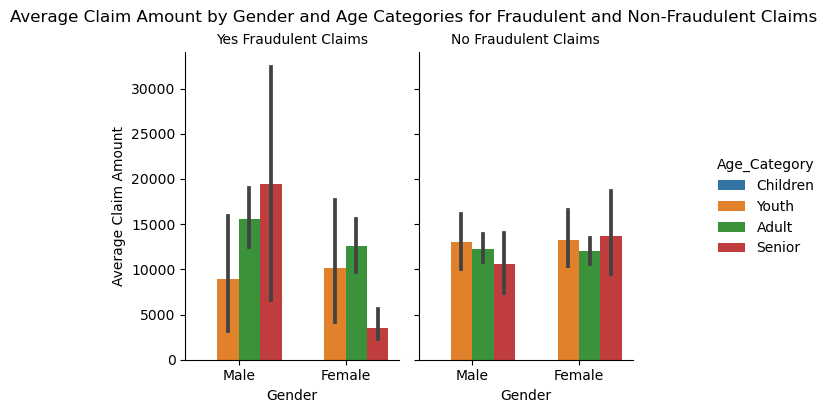

Independent t-test p-value: 0.45581294686319973


In [24]:

fraudulent_data = merged_df[merged_df['fraudulent'] == 'Yes']
non_fraudulent_data = merged_df[merged_df['fraudulent'] == 'No']
bins = [0, 18, 30, 60, float('inf')]
labels = ['Children', 'Youth', 'Adult', 'Senior']
merged_df['Age_Category'] = pd.cut(merged_df['Age'], bins=bins, labels=labels, right=False)

g = sns.catplot(x='gender', y='claim_amount', hue='Age_Category', col='fraudulent', data=merged_df, kind='bar', height=4, aspect=0.7)

g.set_axis_labels('Gender', 'Average Claim Amount')
g.set_titles(col_template='{col_name} Fraudulent Claims')
g.fig.suptitle('Average Claim Amount by Gender and Age Categories for Fraudulent and Non-Fraudulent Claims', y=1.02)
plt.show()

result = stats.ttest_ind(fraudulent_data['claim_amount'], non_fraudulent_data['claim_amount'])
print("Independent t-test p-value:", result.pvalue)


In [26]:
# 1. Hypotheses:


male_data = merged_df[merged_df['gender'] == 'Male']
female_data = merged_df[merged_df['gender'] == 'Female']
result = stats.ttest_ind(male_data['claim_amount'], female_data['claim_amount'])
print("Two-sample t-test p-value:", result.pvalue)



Two-sample t-test p-value: 0.33036643165116597


In [27]:
import scipy.stats as stats
contingency_table = pd.crosstab(merged_df['Age_Category'], merged_df['Segment'])
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-square test p-value:", p)
if p<0.05:
    print("Reject the null hypothesis")
else:
    print("Accept the nulll hypothesis-There is no relationship")

Chi-square test p-value: 0.9708353708959445
Accept the nulll hypothesis-There is no relationship


In [28]:
import scipy.stats as stats
import pandas as pd

merged_df['claim_year'] = merged_df['claim_date'].dt.year

# Find the maximum year in the dataset (current year)
current_year = merged_df['claim_year'].max()

# Filter data for the current year
current_year_data = merged_df[merged_df['claim_year'] == current_year]

# Specify the fiscal average for 2016-17
fiscal_average_2016_17 = 10000

# Perform a one-sample t-test
result = stats.ttest_1samp(current_year_data['claim_amount'], popmean=fiscal_average_2016_17)

# Print the p-value
print("T-test p-value:", result.pvalue)


T-test p-value: 1.2086880225728622e-05


In [29]:
import itertools
age_categories = merged_df['Age_Category'].unique()
for age_group1, age_group2 in itertools.combinations(age_categories, 2):
    data_group1 = merged_df[merged_df['Age_Category'] == age_group1]['claim_amount']
    data_group2 = merged_df[merged_df['Age_Category'] == age_group2]['claim_amount']
    result = stats.ttest_ind(data_group1, data_group2)
    print(f"T-test between {age_group1} and {age_group2}: p-value = {result.pvalue}")
    if result.pvalue<=0.05:
        print("Null Hypothesis is Rejected - Yes there is significant difference")     
    else:
        print("Null Hypothesis is Accepted - No there is no significant difference")

T-test between Adult and Youth: p-value = 0.8930841185969797
Null Hypothesis is Accepted - No there is no significant difference
T-test between Adult and Senior: p-value = 0.33375811849180403
Null Hypothesis is Accepted - No there is no significant difference
T-test between Youth and Senior: p-value = 0.45926657598700815
Null Hypothesis is Accepted - No there is no significant difference


Correlation Coefficient: -0.017448562393468942


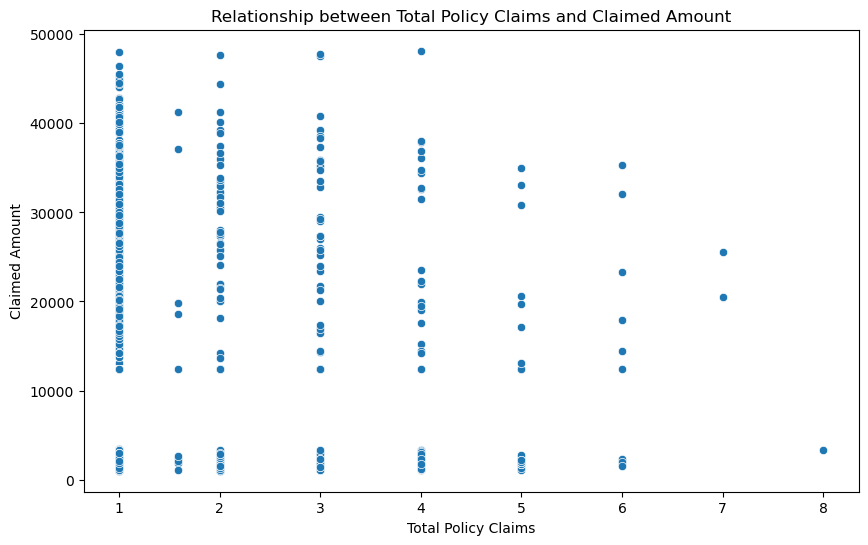

In [30]:
correlation_coefficient, p_value = stats.pearsonr(merged_df['total_policy_claims'], merged_df['claim_amount'])
print("Correlation Coefficient:", correlation_coefficient)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_policy_claims', y='claim_amount', data=merged_df)
plt.title('Relationship between Total Policy Claims and Claimed Amount')
plt.xlabel('Total Policy Claims')
plt.ylabel('Claimed Amount')
plt.show()